# Logistic Regression

### Steps:
- import libraries
- load dataset
- preprocess the data
- split the data
- train the logistic regression model
- test the model
- evaluate the model
- 10 fold cross validation
- store results

In [1]:
# Import ibraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('phishing_site_urls.csv')
print(data.head())
print(data.info())


                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB
None


In [16]:
data['Label'] = data['Label'].map({'good': 0, 'bad': 1})
data['url_length'] = data['URL'].apply(len)
data['contains_https'] = data['URL'].apply(lambda x: 1 if 'https' in x else 0)
data['num_special_chars'] = data['URL'].apply(lambda x: sum([1 for char in x if char in '!@#$%^&*()']))

In [17]:
features = ['url_length', 'contains_https', 'num_special_chars']
X = data[features]
y = data['Label'] 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

In [20]:
cv_results = cross_validate(logreg, X_train, y_train, cv=10, scoring=['accuracy', 'f1', 'roc_auc'], return_train_score=True)

In [21]:
print("Cross-Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1']):.4f}")
print(f"Mean ROC AUC: {np.mean(cv_results['test_roc_auc']):.4f}")

Cross-Validation Results:
Mean Accuracy: 0.7350
Mean F1 Score: 0.1476
Mean ROC AUC: 0.5183


In [22]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [25]:
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nTest Set Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")



Test Set Evaluation:
Accuracy: 0.7352
F1 Score: 0.1492
ROC AUC: 0.5217


In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[78228   357]
 [28734  2551]]


In [27]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     78585
           1       0.88      0.08      0.15     31285

    accuracy                           0.74    109870
   macro avg       0.80      0.54      0.50    109870
weighted avg       0.77      0.74      0.65    109870



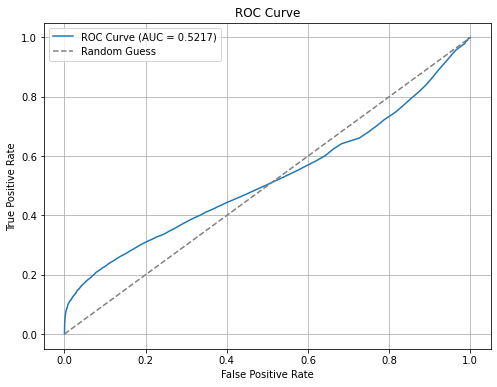

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {test_roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()